## Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

## Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

## The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

# Import Library

In [302]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# Data preparation and Data Cleaning

In [303]:
df=pd.read_csv('test.csv',delimiter=';')

In [304]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [305]:
df.shape

(4521, 17)

In [306]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### There is no missing value. However, we can see that there are some columns with value 'unknown'

In [307]:
df=pd.read_csv('test.csv',delimiter=';',na_values='unknown')

In [308]:
df.isnull().sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [309]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


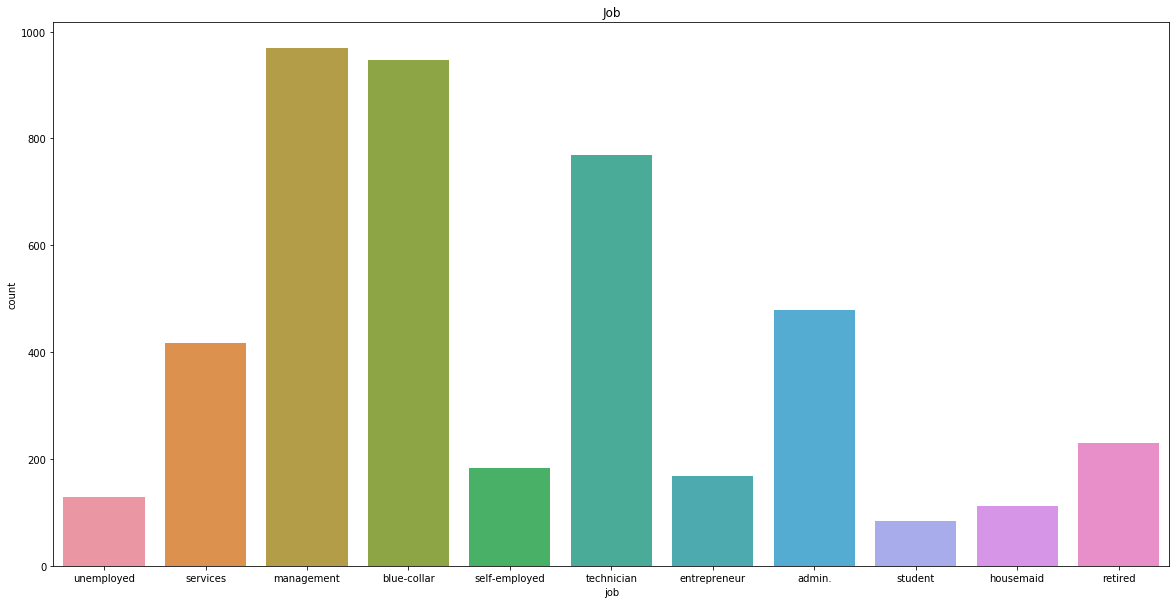

In [221]:
plt.figure(figsize=(20,10))
plt.title('Job')
sns.countplot(df['job'])

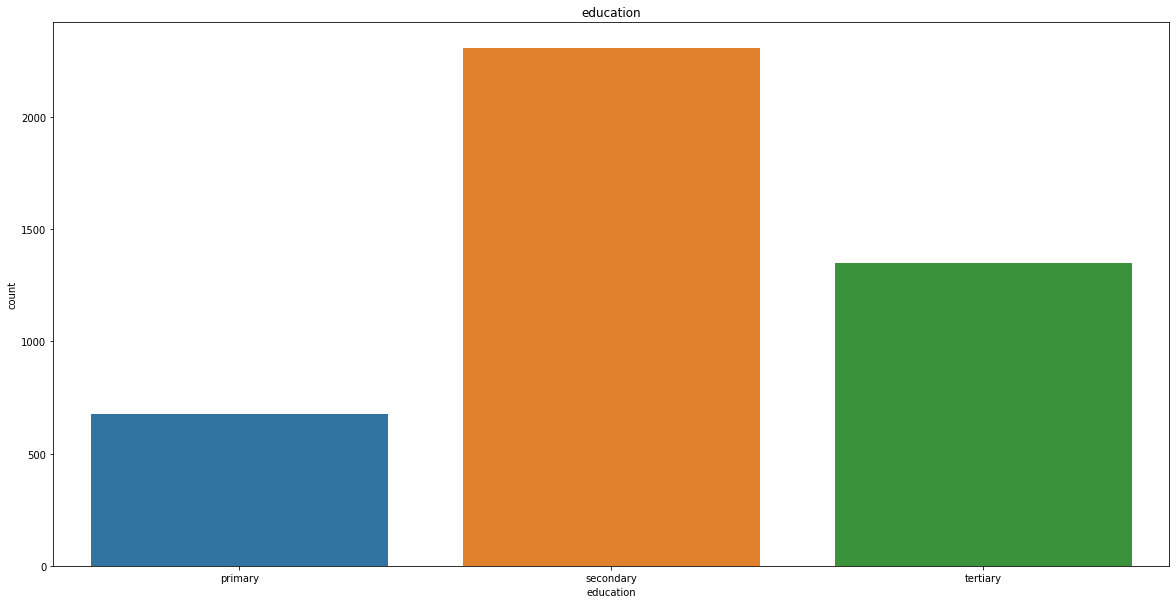

In [135]:
plt.figure(figsize=(20,10))
plt.title('education')
sns.countplot(df['education'])

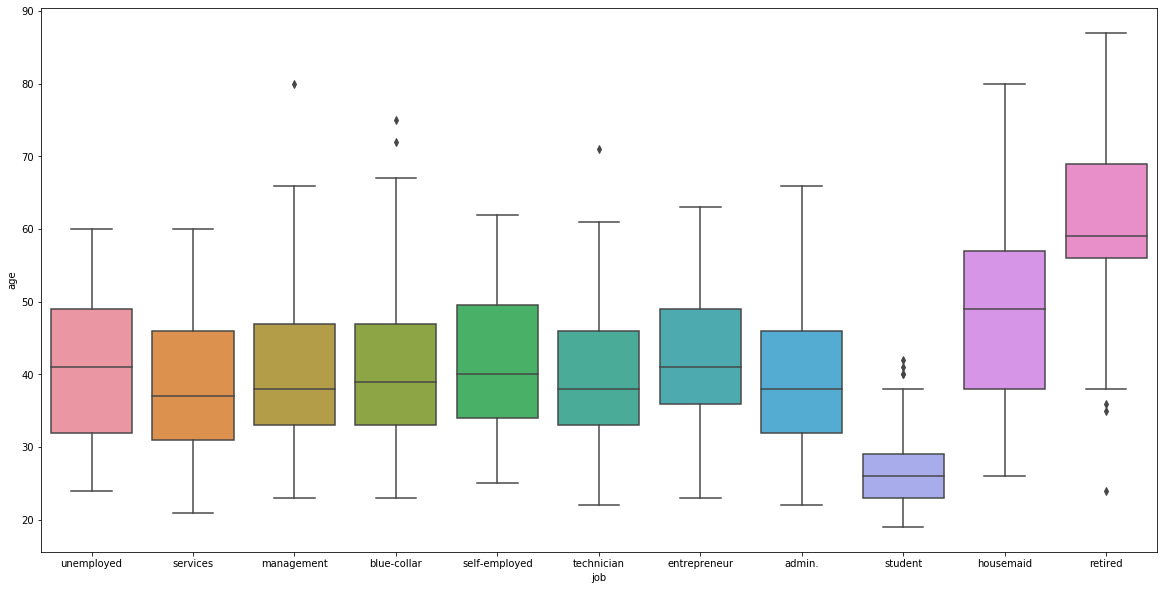

In [124]:
plt.figure(figsize=(20,10))
sns.boxplot(x='job', y='age',data=df)

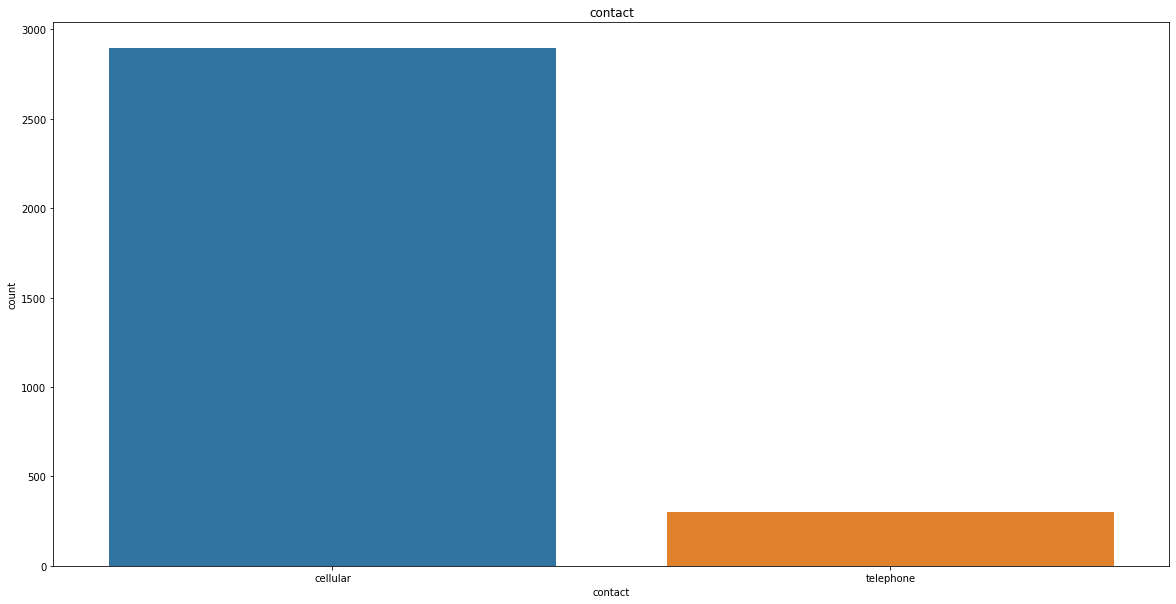

In [144]:
plt.figure(figsize=(20,10))
plt.title('contact')
sns.countplot(df['contact'])

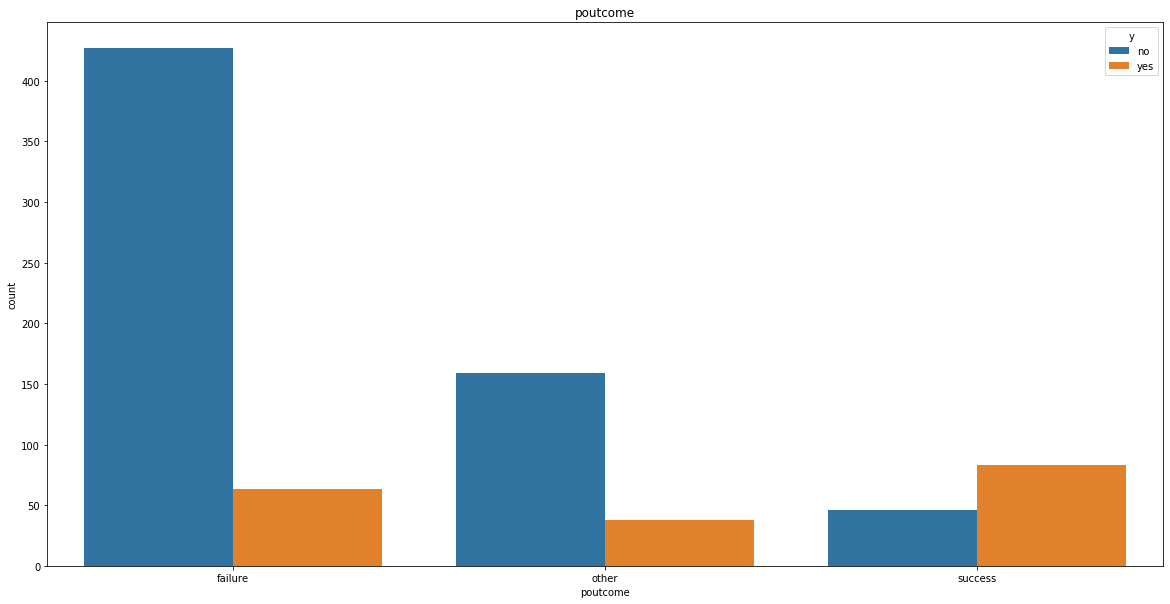

In [179]:
plt.figure(figsize=(20,10))
plt.title('poutcome')
sns.countplot(df['poutcome'])

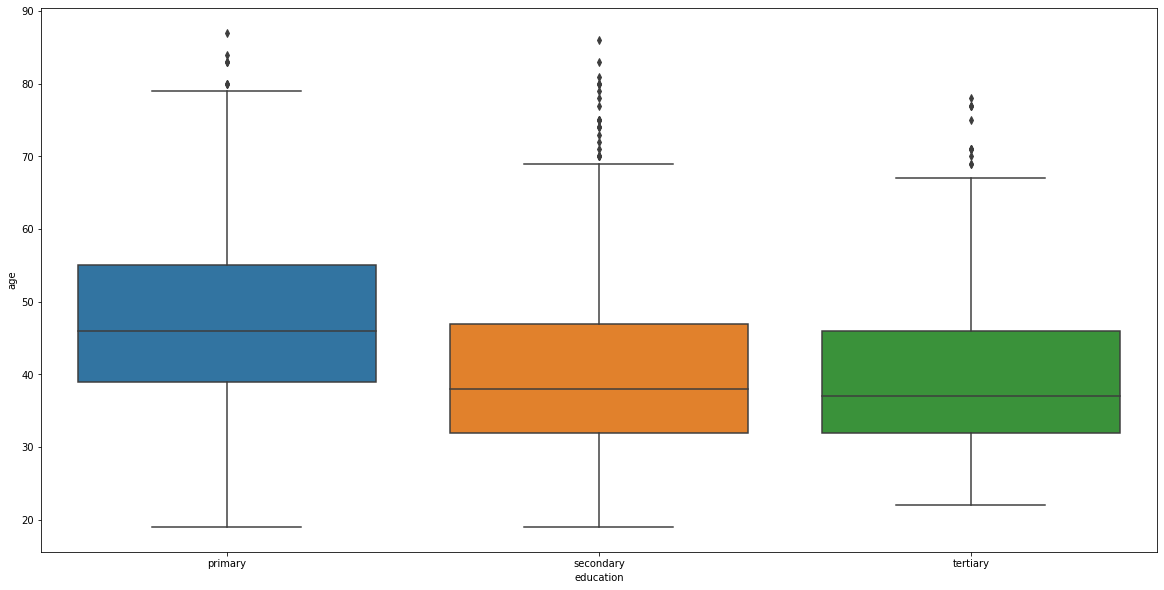

In [143]:
plt.figure(figsize=(20,10))
sns.boxplot(x='education', y='age',data=df)

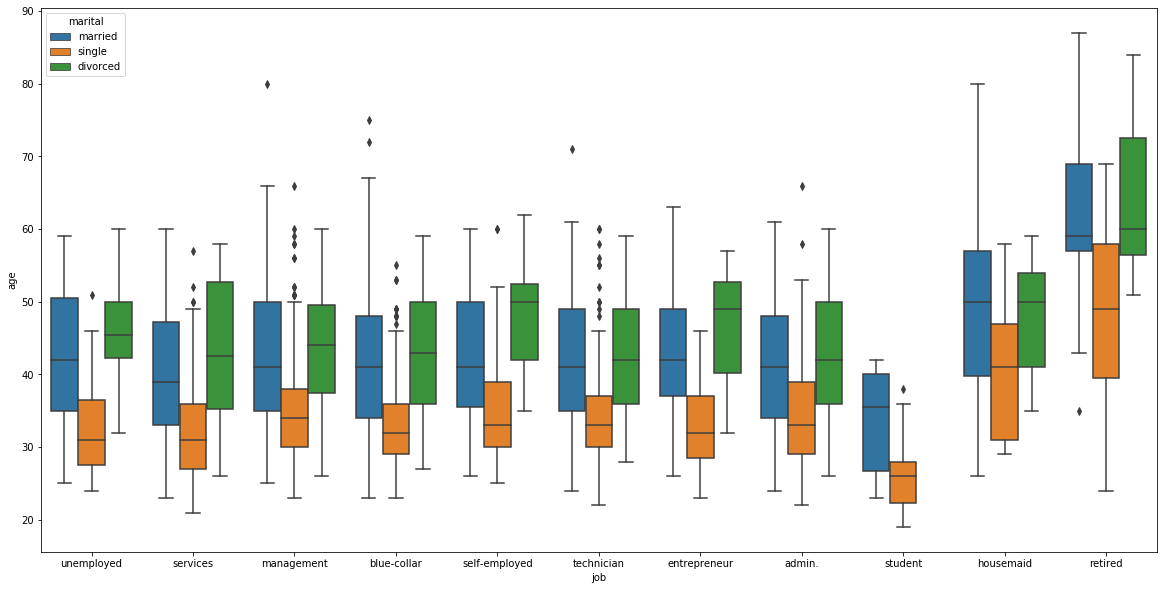

In [141]:
plt.figure(figsize=(20,10))
sns.boxplot(x='job', y='age',hue='marital',data=df)

In [311]:
## Fill Missing Value 

## Fill Missing Job
df['job']=df[df['age']<=30].fillna(value={'job':'student'})
df['job']=df[df['age']>=60].fillna(value={'job':'retired'})
df['job']=df.fillna(value={'job':'management'})

## Fill Education Job
df['education']=df[df['age']>=48].fillna(value={'education':'primary'})
df['education']=df.fillna(value={'education':'secondary'})

## Fill contact Job
df['contact']=df.fillna(value={'contact':'secondary'})

## Fill poutcome Job
df['poutcome']=df.fillna(value={'poutcome':'secondary'})


df.isnull().sum()

age             0
job             0
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,30,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,NaN,no
1,33,33,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,35,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,30,married,tertiary,no,1476,yes,yes,NaN,3,jun,199,4,-1,0,NaN,no
4,59,59,married,secondary,no,0,yes,no,NaN,5,may,226,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,33,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,NaN,no
4517,57,57,married,tertiary,yes,-3313,yes,yes,NaN,9,may,153,1,-1,0,NaN,no
4518,57,57,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,NaN,no
4519,28,28,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [286]:
def Job_Clean(age):
        if age <=30:
            return 'student'
        elif age >=60:
            return 'retired'
        else:
            return 'management'

In [287]:
def Education_Clean(x):
    if age >=48:
        education='primary'
    else:
        education='secondary'
    return education

In [288]:
df['job2']=df.apply(lambda x:Job_Clean(x['age']),axis=1)

In [300]:
df['job3']=df.apply(lambda x: x['job2'] if (x['day']==19) else x['job'] )

KeyError: 'day'

In [295]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job2
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,NaN,no,student
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,management
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,management
3,30,management,married,tertiary,no,1476,yes,yes,NaN,3,jun,199,4,-1,0,NaN,no,student
4,59,blue-collar,married,secondary,no,0,yes,no,NaN,5,may,226,1,-1,0,NaN,no,management
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,NaN,no,management
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,NaN,9,may,153,1,-1,0,NaN,no,management
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,NaN,no,management
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,student


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4483 non-null   object
 2   marital    4521 non-null   object
 3   education  4334 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    3197 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   816 non-null    object
 16  y          4521 non-null   object
 17  job2       4483 non-null   object
dtypes: int64(7), object(11)
memory usage: 635.9+ KB


In [25]:
df[df['job'].isnull()==True].sort_values('age')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1489,27,NaN,single,tertiary,no,6421,no,no,telephone,28,jan,147,4,-1,0,NaN,no
3986,30,NaN,single,tertiary,no,6836,no,no,cellular,27,feb,30,3,-1,0,NaN,no
2487,31,NaN,divorced,tertiary,no,137,no,no,cellular,22,aug,385,9,-1,0,NaN,no
1462,33,NaN,married,secondary,no,2727,no,no,cellular,6,aug,205,3,-1,0,NaN,no
2805,35,NaN,married,primary,no,634,no,no,cellular,7,jul,185,2,-1,0,NaN,no
1432,35,NaN,married,primary,no,365,no,no,cellular,29,aug,41,2,-1,0,NaN,no
178,37,NaN,married,NaN,no,1699,no,no,NaN,9,jun,63,1,-1,0,NaN,no
3385,38,NaN,single,tertiary,no,0,no,no,cellular,11,sep,260,3,95,3,success,yes
4155,39,NaN,single,secondary,no,914,no,no,NaN,5,jun,20,1,-1,0,NaN,no
95,41,NaN,single,tertiary,no,1567,no,no,cellular,1,jul,291,2,-1,0,NaN,no


#### So, it actually has 4 columns with missing values

In [39]:
df.groupby('job').agg({'age':['mean','median'],'balance':['mean','median']})

age             balance       
                    mean median         mean median
job                                                
admin.         39.682008     38  1226.736402  430.0
blue-collar    40.156448     39  1085.161734  408.5
entrepreneur   42.011905     41  1645.125000  365.5
housemaid      47.339286     49  2083.803571  296.5
management     40.540764     38  1766.928793  577.0
retired        61.869565     59  2319.191304  672.5
self-employed  41.453552     40  1392.409836  483.0
services       38.570743     37  1103.956835  288.0
student        26.821429     26  1543.821429  422.5
technician     39.470052     38  1330.996094  434.5
unemployed     40.906250     41  1089.421875  473.5

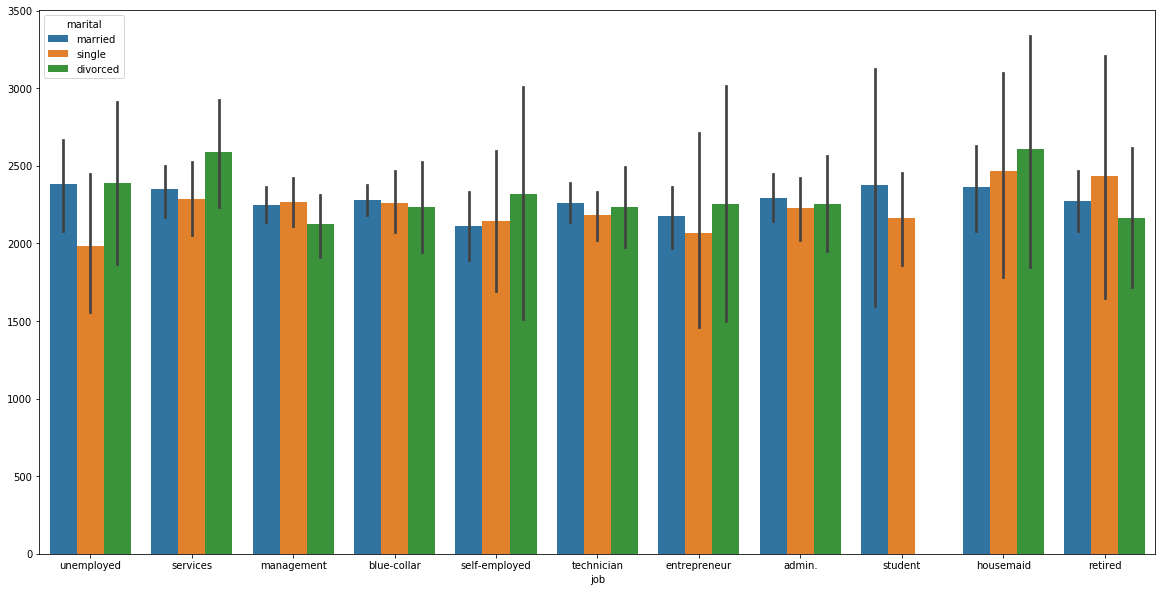

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(x='job',y=df.index,hue='marital',data=df)